#Correlation Between DiabetesPedigreeFunction And Other Variables

DiabetesPedigreeFunction- a function that scores the probability of diabetes based on family history. It is positively skewed with no zero variable.

In this eda, we are trying to understand whether there is some correlation between the DiabetesPedigreeFunction and all other variables.

## Data Cleaning

In [95]:
#loading libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [96]:
#loading and previewing datasets
import pandas as pd
df = pd.read_csv('https://bit.ly/3eoAbDS')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
#renaming the dataset columns
df.columns=df.columns.str.lower().str.replace(' ', '_')
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
#previewing dataset shape
df.shape

(768, 9)

In [99]:
#understanding the dataset further
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset comprises 768 fully populated rows of data across 9 columns.

In [100]:
#finding duplicates
df[df.duplicated()]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome


Our Dataset has no duplicate rows.

## Data Exploration


In this section, we will delve deeper into our dataset to extract valuable insights.

In [101]:
#how many zeros exist per column
df.eq(0).sum()

pregnancies                 111
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                     500
dtype: int64

This suggests that both the DiabetesPedigreeFunction and Age variables were carefully considered as determinants of diabetes within the dataset. Additionally, out of the 768 subjects selected, 500 (65%) were found not to have diabetes.

###**Age Column Analysis**

In [102]:
#doing some descriptive analysis on the age column
df['age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

The Mean age of the subjects in the dataset is 33 while the minimum and maximum ages are 21 and 81 respectively

In [103]:
#finding the diabetes outcome for the minimum and the maximum ages
print(df.loc[df['age'] == 21, 'outcome'].iloc[0])
print(df.loc[df['age'] == 81, 'outcome'].iloc[0])

0
0


While age is a significant risk factor for type 2 diabetes, it's important to note that diabetes can occur at any age, including in children and young adults. Additionally, type 1 diabetes, an autoimmune condition, can develop at any age, although it is more commonly diagnosed in children and adolescents.

In [104]:
#knowing the number of ages in the outliers region

# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))].count().sum()

81

There are 81 entries, which account for 10.55% of the total entries, in the outliers region based on age.

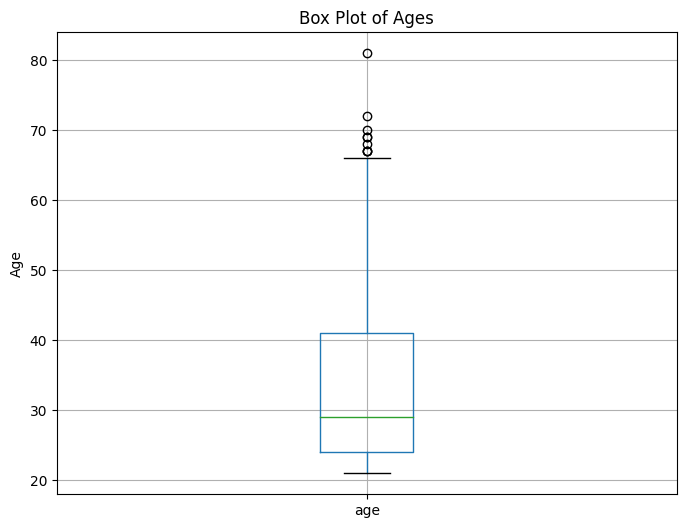

In [105]:
#showing the distribution of the ages using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='age')
plt.title('Box Plot of Ages')
plt.ylabel('Age')
plt.show()

The box plot highlights outliers within the age column. Given that age isn't a significant determinant of diabetes and the outlier count is minimal, addressing them isn't necessary. Additionally, due to the limited dataset size, it wouldn't be fair to handle these outliers.

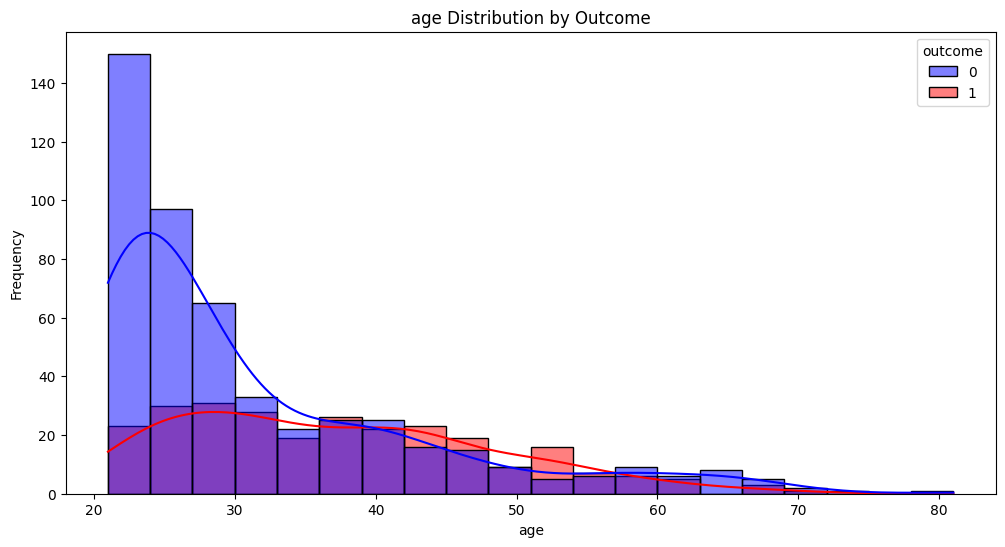

In [106]:
# Plot histogram of age
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for age with color coding for Outcome
sns.histplot(data=df, bins=20, x='age', hue='outcome', palette=['blue', 'red'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('age Distribution by Outcome')

# Display the plot
plt.show()

The distribution of the age is positively skewed, indicating that most individuals in our sample population are young with most of them being between ages 25-40.

In [107]:
#Showing distribution of diabetes per age group

import pandas as pd

# Define age groups
bins = range(20, 91, 10)  # Create bins for 10-year intervals
labels = [f'{i}-{i+9}' for i in range(20, 90, 10)]  # Create labels for the age groups

# Add age group column to the DataFrame
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Compute the proportions
age_outcome_counts = df.groupby(['age_group', 'outcome']).size().unstack(fill_value=0)
age_outcome_counts['Total'] = age_outcome_counts.sum(axis=1)
age_outcome_counts['outcome_0'] = age_outcome_counts[0] / age_outcome_counts['Total']
age_outcome_counts['outcome_1'] = age_outcome_counts[1] / age_outcome_counts['Total']

# Display the table
print(age_outcome_counts)

outcome      0   1  Total  outcome_0  outcome_1
age_group                                      
20-29      312  84    396   0.787879   0.212121
30-39       89  76    165   0.539394   0.460606
40-49       53  65    118   0.449153   0.550847
50-59       23  34     57   0.403509   0.596491
60-69       21   8     29   0.724138   0.275862
70-79        1   1      2   0.500000   0.500000
80-89        1   0      1   1.000000   0.000000


There are more people with diabetes between ages 40-60.

###**diabetespedigreefunction Column Analysis**

In [108]:
#doing some descriptive analysis on the DPF column
df['diabetespedigreefunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: diabetespedigreefunction, dtype: float64

The Mean DPF is 0.47186 and the minimum and maximum DPF are 0.078 and 2.42 respectively.

In [109]:
#finding the diabetes outcome for the minimum and the maximum DPF values
print(df.loc[df['diabetespedigreefunction'] == 0.078000, 'outcome'].iloc[0])
print(df.loc[df['diabetespedigreefunction'] == 2.420000, 'outcome'].iloc[0])

0
1


While a high DPF score indicates a strong familial history of diabetes and suggests a higher risk of developing the condition, it is not a definitive predictor of diabetes on its own. A high DPF score indicates a higher likelihood of diabetes within the family but does not determine whether an individual will develop diabetes or not.

In [110]:
#knowing the number of diabetespedigreefunction values in the outliers region

# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['diabetespedigreefunction'].quantile(0.25)
Q3 = df['diabetespedigreefunction'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['diabetespedigreefunction'] < (Q1 - 1.5 * IQR)) | (df['diabetespedigreefunction'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['diabetespedigreefunction'] < (Q1 - 1.5 * IQR)) | (df['diabetespedigreefunction'] > (Q3 + 1.5 * IQR))].count().sum()

290

There are 261 entries, which account for 33.98% of the total entries, in the outliers region based on diabetespedigreefunction.

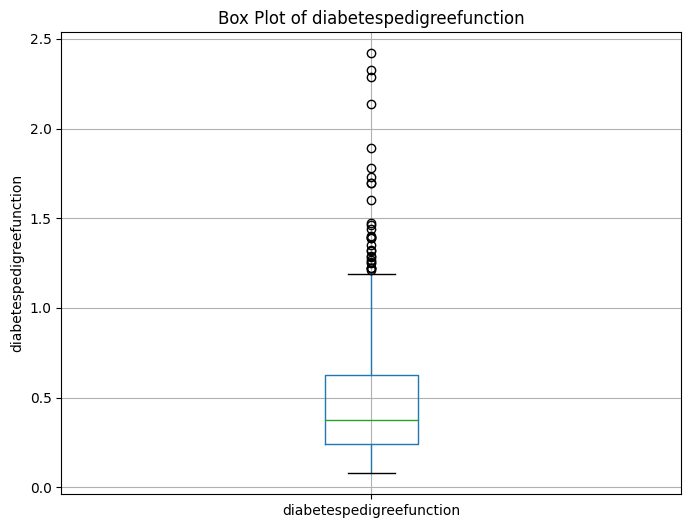

In [111]:
#showing the distribution of the DPF using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='diabetespedigreefunction')
plt.title('Box Plot of diabetespedigreefunction')
plt.ylabel('diabetespedigreefunction')
plt.show()

The box plot indicates the presence of outliers in the diabetespedigreefunction column. Due to the limited dataset size, it wouldn't be fair to handle these outliers.

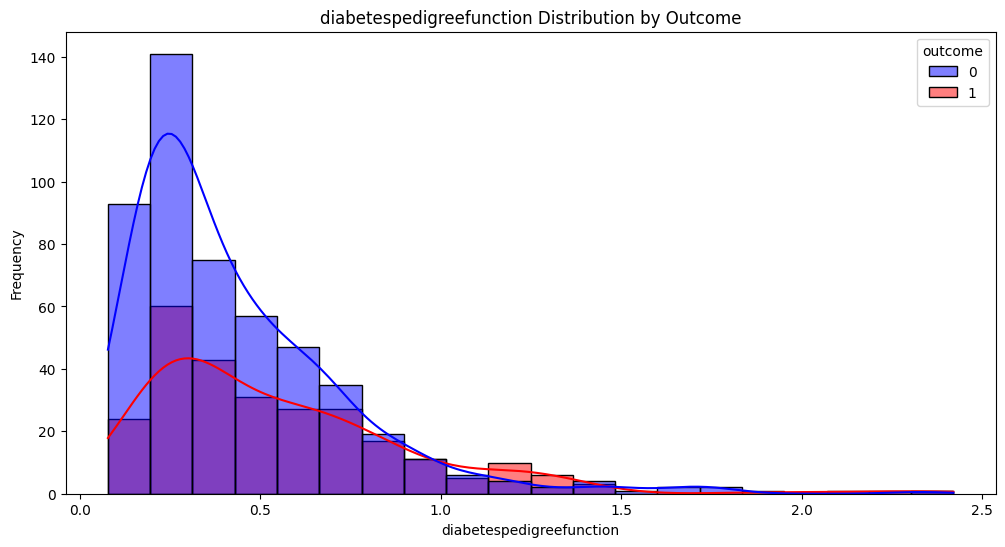

In [112]:
# Plot histogram of diabetespedigreefunction
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for diabetespedigreefunction with color coding for Outcome
sns.histplot(data=df, bins=20, x='diabetespedigreefunction', hue='outcome', palette=['blue', 'red'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('diabetespedigreefunction')
plt.ylabel('Frequency')
plt.title('diabetespedigreefunction Distribution by Outcome')

# Display the plot
plt.show()

The distribution of the diabetes pedigree function is positively skewed, indicating that most individuals in our sample population have a low diabetes pedigree function.

Most of the people with diabetes have a high diabetes pedigree function.

###**Pregnancies Column Analysis**

In [113]:
#doing some descriptive analysis on the pregnancies column
df['pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: pregnancies, dtype: float64

The Mean number of pregnancies is 3 and the minimum and maximum number of pregnancies are 0 and 17 respectively.

In [114]:
#finding the diabetes outcome for the minimum and the maximum DPF values
print(df.loc[df['pregnancies'] == 0, 'outcome'].iloc[0])
print(df.loc[df['pregnancies'] == 17, 'outcome'].iloc[0])

1
1


The number of pregnancies alone does not conclusively determine the likelihood of diabetes for an individual, as both those with the maximum and minimum number of pregnancies in our dataset can have diabetes.

In [115]:
#knowing the number of pregnancies in the outliers region

# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['pregnancies'].quantile(0.25)
Q3 = df['pregnancies'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['pregnancies'] < (Q1 - 1.5 * IQR)) | (df['pregnancies'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['pregnancies'] < (Q1 - 1.5 * IQR)) | (df['pregnancies'] > (Q3 + 1.5 * IQR))].count().sum()

40

There are 36 entries, which account for 4.6% of the total entries, in the outliers region based on age.

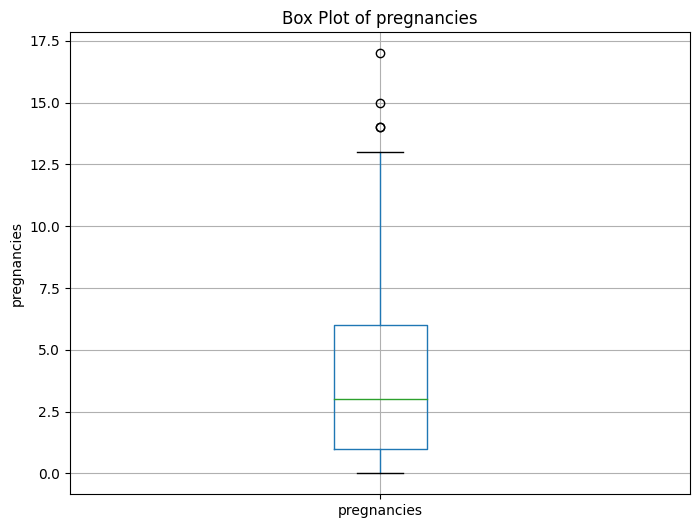

In [116]:
#showing the distribution of the DPF using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='pregnancies')
plt.title('Box Plot of pregnancies')
plt.ylabel('pregnancies')
plt.show()

The box plot reveals outliers within the pregnancies column. While it's feasible to have 0 pregnancies in a dataset, given its limited size, it might not be appropriate to address these outliers.

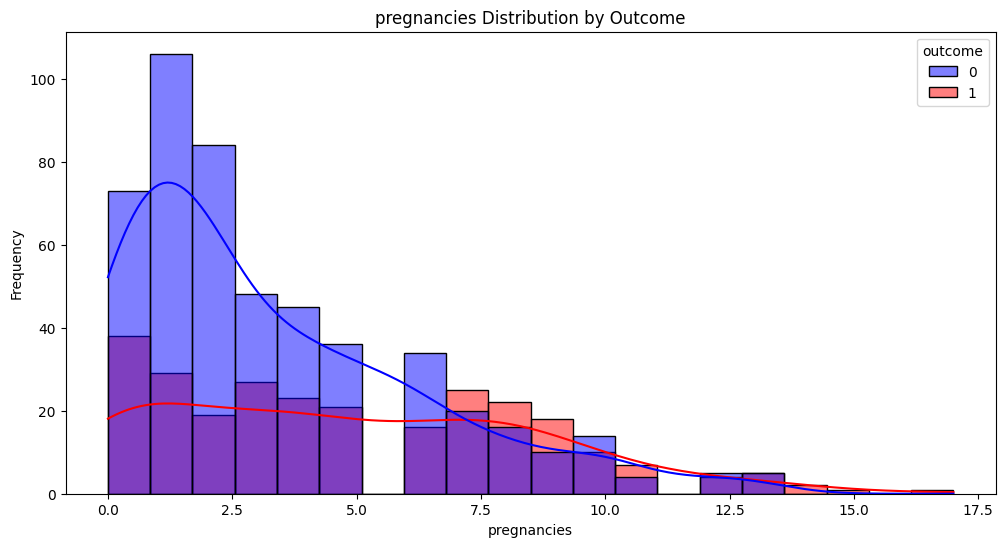

In [117]:
# Plot histogram of pregnancies
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for pregnancies with color coding for Outcome
sns.histplot(data=df, bins=20, x='pregnancies', hue='outcome', palette=['blue', 'red'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('pregnancies')
plt.ylabel('Frequency')
plt.title('pregnancies Distribution by Outcome')

# Display the plot
plt.show()

The distribution of glucose exhibits positive skewness, leaning towards the right, indicating that the majority of our population typically experiences fewer pregnancies, primarily between 0 and 7.

Most of the people with diabetes have had more than 6 pregnancies.

In [118]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group
0,6,148,72,35,0,33.6,0.627,50,1,50-59
1,1,85,66,29,0,26.6,0.351,31,0,30-39
2,8,183,64,0,0,23.3,0.672,32,1,30-39
3,1,89,66,23,94,28.1,0.167,21,0,20-29
4,0,137,40,35,168,43.1,2.288,33,1,30-39


###**Glucose Column Analysis**

In [119]:
#doing some descriptive analysis on the glucose column
df['glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: glucose, dtype: float64

The mean glucose level is 120.89, with the minimum and maximum values being 0 and 199 respectively. Given that patients were tested for diabetes and not other conditions like severe hypoglycemia, a glucose level of exactly 0 is unlikely due to glucose's essential role as an energy source for cells. It's reasonable to conclude that these 0 entries represent null values missed for these patients.

In [120]:
#finding the diabetes outcome for the minimum and the maximum glucose values
print(df.loc[df['glucose'] == 44, 'outcome'].iloc[0])
print(df.loc[df['glucose'] == 199, 'outcome'].iloc[0])

0
1


In [121]:
#finding number of rows with glucose levels not equal to 0
(df['glucose'] != 0).sum()

763

In [122]:
#finding the diabetes outcome for the minimum and the maximum glucose levels
print(df.loc[df['glucose'] == 44, 'outcome'].iloc[0])
print(df.loc[df['glucose'] == 199, 'outcome'].iloc[0])

0
1


From this observation we can infer the following: A low glucose level (hypoglycemia) is not typically considered a determinant of diabetes. In fact, hypoglycemia is often associated with diabetes treatment, particularly in individuals with diabetes who use insulin or certain medications to lower blood sugar levels. A high glucose level (hyperglycemia) is a primary determinant of diabetes.

In [123]:
#knowing the number of glucose levels in the outliers region

# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['glucose'] < (Q1 - 1.5 * IQR)) | (df['glucose'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['glucose'] < (Q1 - 1.5 * IQR)) | (df['glucose'] > (Q3 + 1.5 * IQR))].count().sum()

50

There are 45 entries, which account for 5.9% of the total viable entries, in the outliers region based on age.

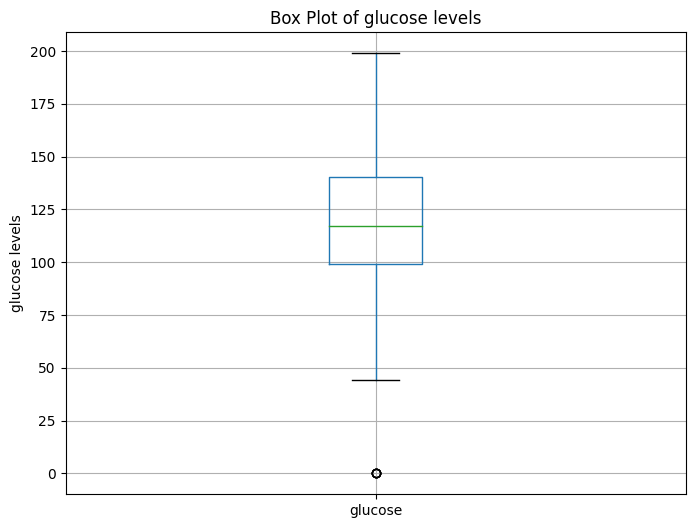

In [124]:
#showing the distribution of glucose levels using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='glucose')
plt.title('Box Plot of glucose levels')
plt.ylabel('glucose levels')
plt.show()

The box plot indicates outliers in the glucose column. Since a glucose level of 0 is physiologically implausible, addressing these outliers entails adjusting them to the mean value of the glucose column, which is 120.894531.

In [125]:
#dealing with outliers with a value of 0 in the glucose column by adjusting them to the mean.
# Calculate the mean of the 'glucose' column
mean_glucose = df['glucose'].mean()

# Replace 0 values with the mean of the column
df['glucose'] = df['glucose'].apply(lambda x: mean_glucose if x == 0 else x)

print(df['glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: glucose, Length: 768, dtype: float64


We have used the apply() method to iterate over each value in the 'glucose' column. Inside the lambda function, we checked if the value x is equal to 0. If it is, we replaced it with the mean_glucose; otherwise, we kept the original value x.

In [126]:
#descriptive analysis on the updated glucose column
df['glucose'].describe()

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: glucose, dtype: float64

The new mean glucose level is 121.68, with the minimum and maximum values being 44 and 199 respectively.

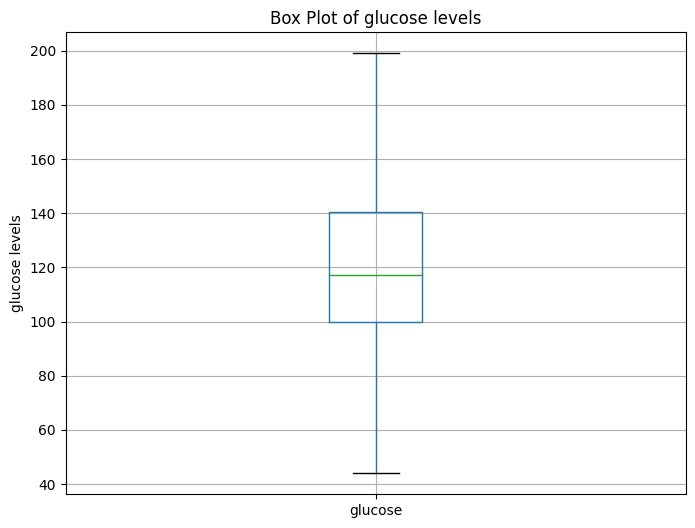

In [127]:
#updated box plot showing distribution of glucose levels after remoning zero values
plt.figure(figsize=(8, 6))
df.boxplot(column='glucose')
plt.title('Box Plot of glucose levels')
plt.ylabel('glucose levels')
plt.show()

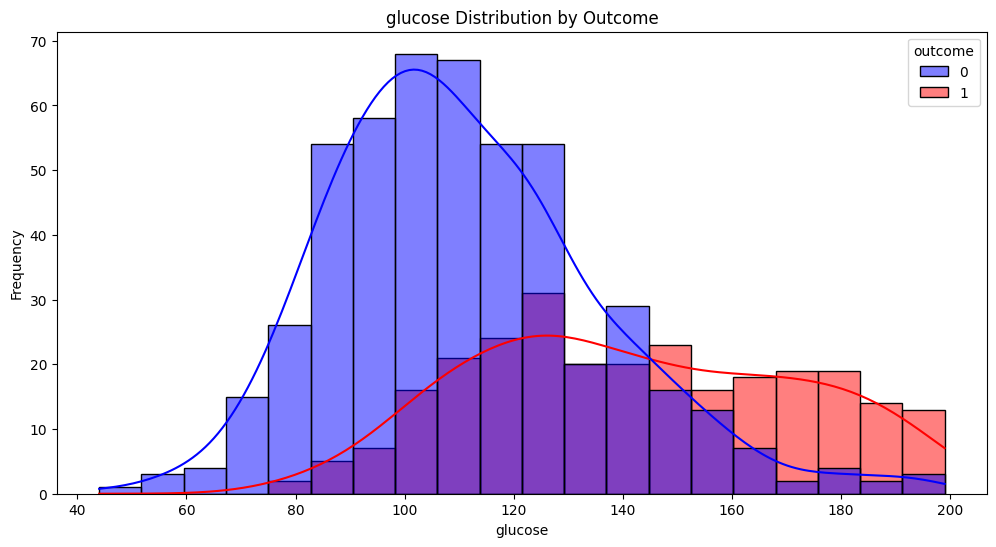

In [128]:
# Plot histogram of glucose
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for glucose with color coding for Outcome
sns.histplot(data=df, bins=20, x='glucose', hue='outcome', palette=['blue', 'red'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('glucose')
plt.ylabel('Frequency')
plt.title('glucose Distribution by Outcome')

# Display the plot
plt.show()

glucose has a normal distribution with our population mostly having glucose levels of between 70-150.

Most people with diabetes have high glucose levels.

In [129]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group
0,6,148.0,72,35,0,33.6,0.627,50,1,50-59
1,1,85.0,66,29,0,26.6,0.351,31,0,30-39
2,8,183.0,64,0,0,23.3,0.672,32,1,30-39
3,1,89.0,66,23,94,28.1,0.167,21,0,20-29
4,0,137.0,40,35,168,43.1,2.288,33,1,30-39


###BloodPressure Column Analysis

In [130]:
#doing some descriptive analysis on the bloodpressure column
df['bloodpressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: bloodpressure, dtype: float64

The mean blood pressure is 69.105, ranging from 0 to 122. Considering the sample population was alive during data recording, a blood pressure of exactly 0 is incompatible with life. It's reasonable to assume these 0 entries represent missed null values for these patients.

In [131]:
#finding minimum bloodpressure that is not 0
df[df['bloodpressure'] != 0]['bloodpressure'].min()

24

In [132]:
#finding number of rows with bloodpressure not equal to 0
(df['bloodpressure'] != 0).sum()

733

In [133]:
#finding the diabetes outcome for the minimum and the maximum bloodpressure levels
print(df.loc[df['bloodpressure'] == 24, 'outcome'].iloc[0])
print(df.loc[df['bloodpressure'] == 122, 'outcome'].iloc[0])

0
0


From our dataset, it is apparent that individuals with either low or high blood pressure may not necessarily have diabetes. It is important to note though that hypotension (low blood pressure) and hypertension (high blood pressure) are suitable conditions for diabetes.

In [134]:
#knowing the number of bloodpressure levels in the outliers region

# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['bloodpressure'].quantile(0.25)
Q3 = df['bloodpressure'].quantile(0.75)

IQR = Q3 - Q1

# Identify outliers
df[(df['bloodpressure'] < (Q1 - 1.5 * IQR)) | (df['bloodpressure'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['bloodpressure'] < (Q1 - 1.5 * IQR)) | (df['bloodpressure'] > (Q3 + 1.5 * IQR))].count().sum()

450

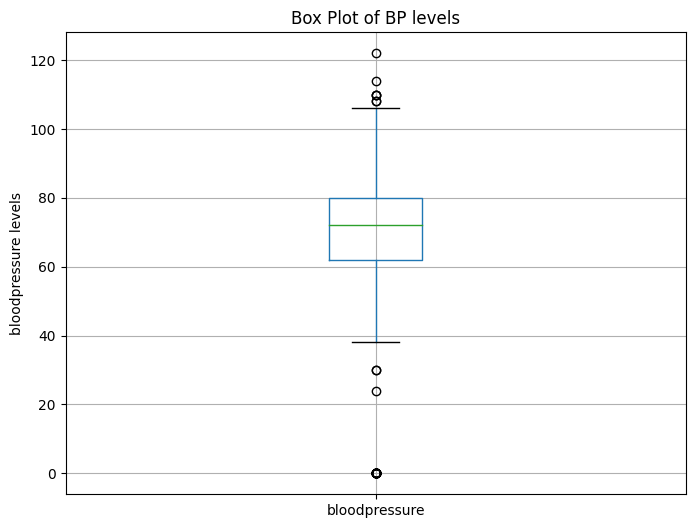

In [135]:
#showing the distribution of BP using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='bloodpressure')
plt.title('Box Plot of BP levels')
plt.ylabel('bloodpressure levels')
plt.show()

The box plot highlights outliers within the blood pressure column. Considering that a blood pressure reading of 0 is physiologically implausible for a living human, rectifying these outliers with a blood pressure recording of 0 involves adjusting them to the mean value of the blood pressure column, which is 69.105469.

In [136]:
#dealing with outliers with a value of 0 in the bloodpressure column by adjusting them to the mean.
# Calculate the mean of the 'bloodpressure' column
mean_bloodpressure= df['bloodpressure'].mean()

# Replace 0 values with the mean of the column
df['bloodpressure'] = df['bloodpressure'].apply(lambda x: mean_bloodpressure if x == 0 else x)

df['bloodpressure'].describe()

count    768.000000
mean      72.254807
std       12.115932
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: bloodpressure, dtype: float64

The new mean bloodpressure level is 72.25, with the minimum and maximum values being 24 and 122 respectively.

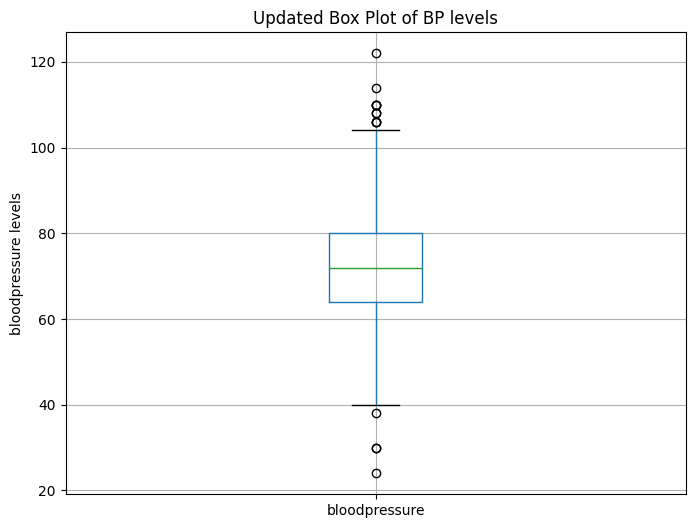

In [137]:
#updated box plot showing the distribution of BP
plt.figure(figsize=(8, 6))
df.boxplot(column='bloodpressure')
plt.title('Updated Box Plot of BP levels')
plt.ylabel('bloodpressure levels')
plt.show()

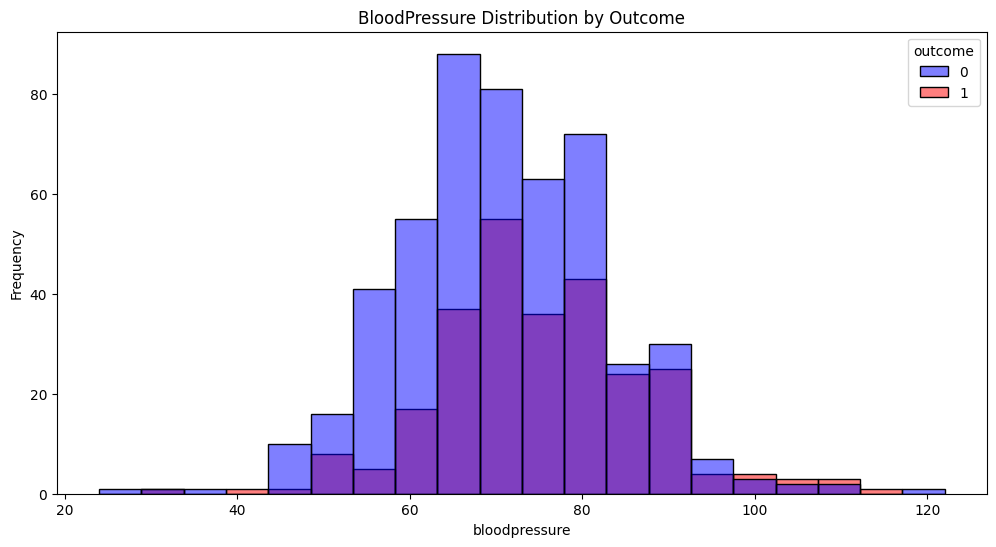

In [138]:
# BloodPressure
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for bloodpressure with color coding for Outcome
sns.histplot(data=df, bins=20, x='bloodpressure', hue='outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('bloodpressure')
plt.ylabel('Frequency')
plt.title('BloodPressure Distribution by Outcome')

# Display the plot
plt.show()

The blood pressure distribution within our population typically follows a normal distribution, with the majority falling within the range of 50-90.

Most people with diabetes have very high blood pressure with some having low blood pressure.

In [139]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group
0,6,148.0,72.0,35,0,33.6,0.627,50,1,50-59
1,1,85.0,66.0,29,0,26.6,0.351,31,0,30-39
2,8,183.0,64.0,0,0,23.3,0.672,32,1,30-39
3,1,89.0,66.0,23,94,28.1,0.167,21,0,20-29
4,0,137.0,40.0,35,168,43.1,2.288,33,1,30-39


###**skinthickness Column Analysis**

In [140]:
#doing some descriptive analysis on the skinthickness column
df['skinthickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: skinthickness, dtype: float64

The mean blood pressure is 20.54, ranging from 0 to 99. It is highly unlikely to have a skinthickness of 0, a skin thickness measurement of 0 could potentially indicate an error in data collection, recording, or entry.

In [141]:
#finding minimum skinthickness that is not 0
df[df['skinthickness'] != 0]['skinthickness'].min()

7

In [142]:
#finding the diabetes outcome for the minimum non-zero and the maximum skinthickness values
print(df.loc[df['skinthickness'] == 7, 'outcome'].iloc[0])
print(df.loc[df['skinthickness'] == 99, 'outcome'].iloc[0])

1
1


While skin changes may be observed in individuals with diabetes, they are not standalone determinants of the condition.

In [143]:
#knowing the number of skinthickness levels in the outliers region

# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['skinthickness'].quantile(0.25)
Q3 = df['skinthickness'].quantile(0.75)

IQR = Q3 - Q1

# Identify outliers
df[(df['skinthickness'] < (Q1 - 1.5 * IQR)) | (df['skinthickness'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['skinthickness'] < (Q1 - 1.5 * IQR)) | (df['skinthickness'] > (Q3 + 1.5 * IQR))].count().sum()

10

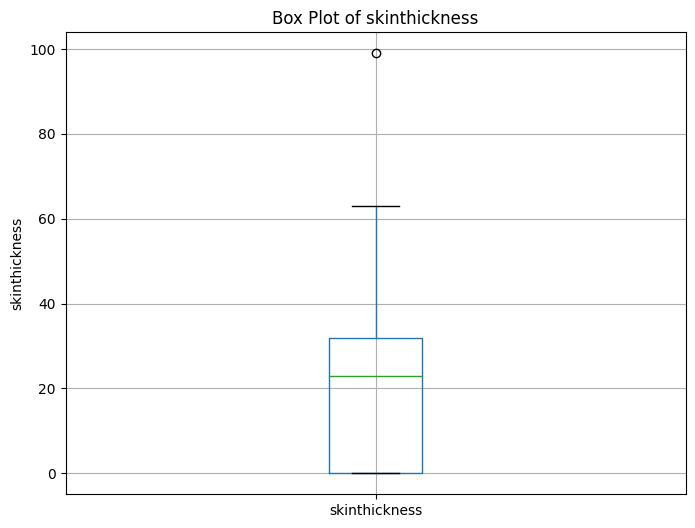

In [144]:
#showing the distribution of skinthickness using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='skinthickness')
plt.title('Box Plot of skinthickness')
plt.ylabel('skinthickness')
plt.show()

The box plot highlights outliers within the skinthickness column. Considering that a skinthickness reading of 0 is highly unlikely, rectifying these recordings with a skinthickness recording of 0 involves adjusting them to the mean value of the skinthickness column, which is 20.536458.

In [145]:
#dealing with outliers with a value of 0 in the skinthickness column by adjusting them to the mean.
# Calculate the mean of the 'skinthickness' column
mean_skinthickness= df['skinthickness'].mean()

# Replace 0 values with the mean of the column
df['skinthickness'] = df['skinthickness'].apply(lambda x: mean_skinthickness if x == 0 else x)

df['skinthickness'].describe()

count    768.000000
mean      26.606479
std        9.631241
min        7.000000
25%       20.536458
50%       23.000000
75%       32.000000
max       99.000000
Name: skinthickness, dtype: float64

The new mean skinthickness level is 26.606479, with the minimum and maximum values being 7 and 99 respectively.

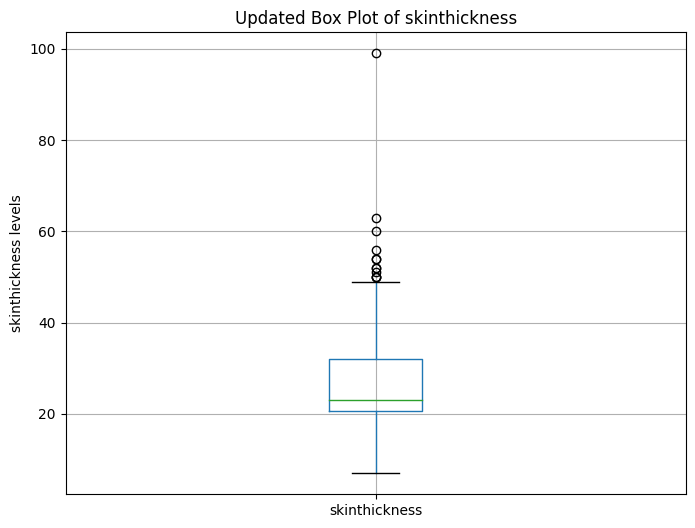

In [146]:
#updated box plot showing the distribution of skinthickness
plt.figure(figsize=(8, 6))
df.boxplot(column='skinthickness')
plt.title('Updated Box Plot of skinthickness')
plt.ylabel('skinthickness levels')
plt.show()

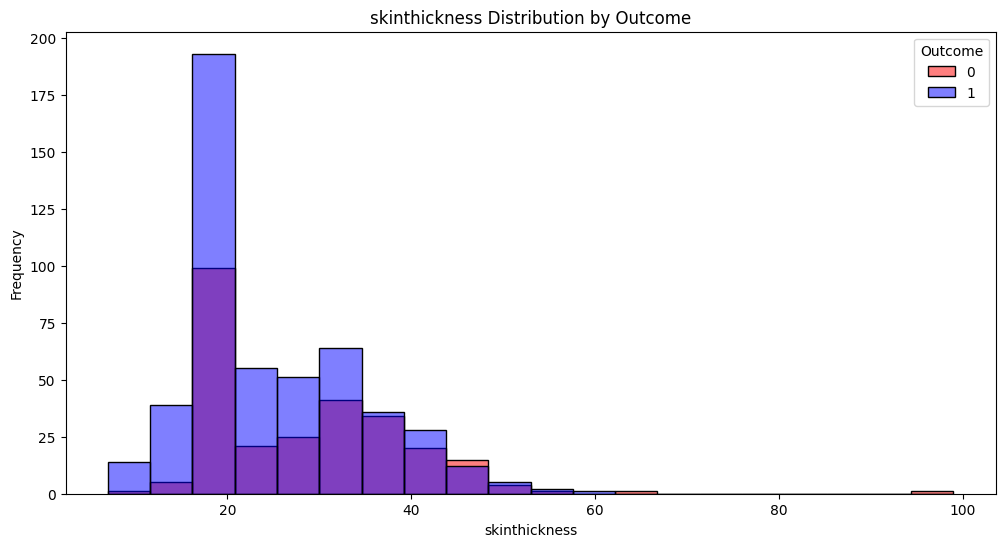

In [147]:
# Plot histogram of skinthickness
# Set the figure size
plt.figure(figsize=(12, 6))

# Filter the data to include only two unique values for 'outcome'
df_filtered = df[df['outcome'].isin([0, 1])]

# Plot histogram for skinthickness with color coding for Outcome
sns.histplot(data=df_filtered, bins=20, x='skinthickness', hue='outcome', palette=['blue', 'red'], alpha=0.5)

# Customize the legend
plt.legend(title='Outcome', labels=['0', '1'], loc='upper right')

# Add labels and title
plt.xlabel('skinthickness')
plt.ylabel('Frequency')
plt.title('skinthickness Distribution by Outcome')

# Display the plot
plt.show()

skinthickness is positively skewed/right-skewed meaning there are more people with a lower skinthickness than with higher skinthickness.Most people have skinthickness of below 40.

Most peaple with a skin thickness of beyond 40 have diabetes.

In [148]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1,50-59
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0,30-39
2,8,183.0,64.0,20.536458,0,23.3,0.672,32,1,30-39
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0,20-29
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1,30-39


###**insulin Column Analysis**

In [149]:
#performing descriptive analysis on insulin dolumn

df['insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: insulin, dtype: float64

The mean insulin level is 79.799, ranging from 0 to 846. It is highly improbable for a human to have an insulin level of exactly 0 under normal physiological conditions. While individuals with diabetes or certain medical conditions may have low insulin levels, an insulin level of 0 would typically indicate severe insulin deficiency, which can be life-threatening. In practice, even individuals with diabetes usually have some level of circulating insulin, although it may be insufficient to regulate blood sugar effectively. An insulin level of 0 could potentially indicate an error in data collection, recording, or entry.

In [150]:
#finding minimum insulin level that is not 0
df[df['insulin'] != 0]['insulin'].min()

14

In [151]:
#finding the diabetes outcome for the minimum non-zero and the maximum insulin values
print(df.loc[df['insulin'] == 14, 'outcome'].iloc[0])
print(df.loc[df['insulin'] == 846, 'outcome'].iloc[0])

1
1


From this observation, we can infer that the individuals with the highest or the lowest insulin levels have diabetes. Low insulin levels are characteristic of type 1 diabetes. High insulin levels, especially in the context of insulin resistance, can be a precursor to the development of type 2 diabetes.

In [152]:
#knowing the amount of insulin levels in the outliers region

# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['insulin'].quantile(0.25)
Q3 = df['insulin'].quantile(0.75)

IQR = Q3 - Q1

# Identify outliers
df[(df['insulin'] < (Q1 - 1.5 * IQR)) | (df['insulin'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['insulin'] < (Q1 - 1.5 * IQR)) | (df['insulin'] > (Q3 + 1.5 * IQR))].count().sum()

340

There are a lot of outliers in the insulin column. A reason to this may be due to the fact that the data collection process was bias towards people with extreme insulin levels. This data might therefore not accurately reflect the true distribution of the data in the population.

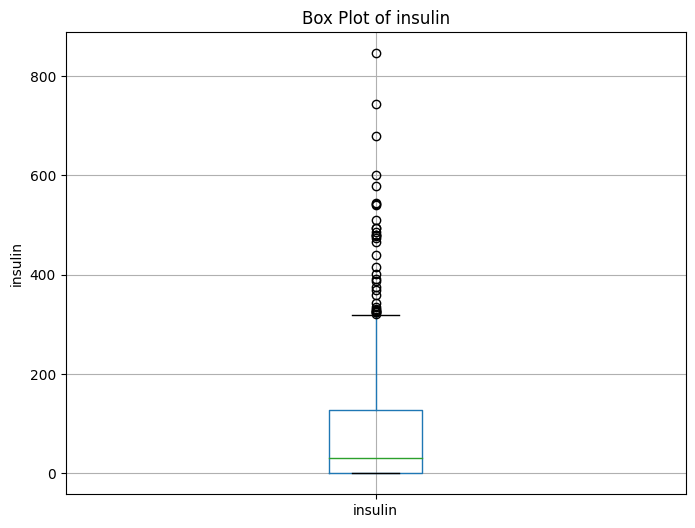

In [153]:
#showing the distribution of insulin using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='insulin')
plt.title('Box Plot of insulin')
plt.ylabel('insulin')
plt.show()

I am going to use Non-parametric methods to identify the count of these outliers

In [154]:
import numpy as np

# Calculate the median absolute deviation (MAD)
median = np.median(df['insulin'])
mad = np.median(np.abs(df['insulin'] - median))

# Define the threshold for outlier detection
threshold = 3.5 * mad

# Identify outliers
outliers = df['insulin'][abs(df['insulin'] - median) > threshold]

outliers.count()

173

Median Absolute Derivative (MAD) is a robust measure of variability that is less affected by outliers compared to the standard deviation. It can be used to identify outliers based on their deviation from the median of the data. MAD is less sensitive to outliers compared to the standard deviation. Because it uses the median instead of the mean, extreme values have less influence on MAD, making it more robust in the presence of outliers. To deal with these outliers, we can decide to use various methods such as removing data, winsorization, log transformation, replacing them with the mean/mode/median. Since the data is not that large, we can decide to proceed with the outliers as is.

We can address the presence of zero values in the insulin levels, which are practically improbable. These values may arise from data entry errors or missing data that defaulted to zero. To manage this issue, we can replace these zero values with the mean of the insulin column.

In [155]:
#dealing with recorded of 0 values in the insulin column by adjusting them to the mean.
# Calculate the mean of the 'insulin' column
df['insulin'].mean()

# Replace 0 values with the mean of the column
df['insulin'] = df['insulin'].apply(lambda x: df['insulin'].mean() if x == 0 else x)

df['insulin'].describe()

count    768.000000
mean     118.660163
std       93.080358
min       14.000000
25%       79.799479
50%       79.799479
75%      127.250000
max      846.000000
Name: insulin, dtype: float64

The new mean insulin levels is 118.660163, with the minimum and maximum values being 14 and 846 respectively.

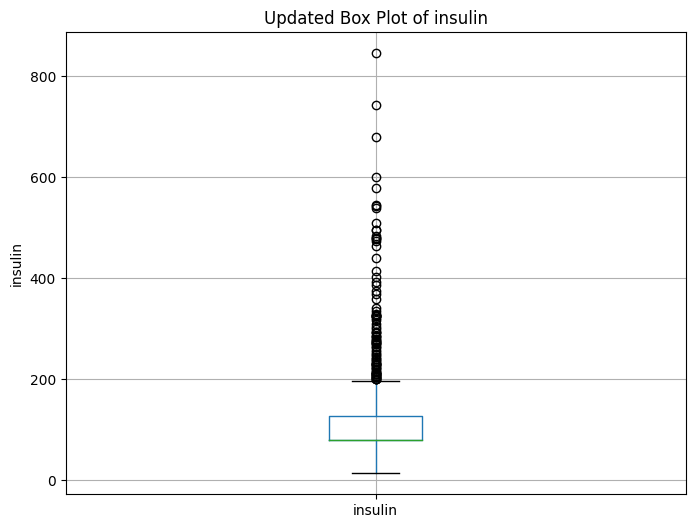

In [156]:
#upated box plot showing the distribution of insulin levels
plt.figure(figsize=(8, 6))
df.boxplot(column='insulin')
plt.title('Updated Box Plot of insulin')
plt.ylabel('insulin')
plt.show()

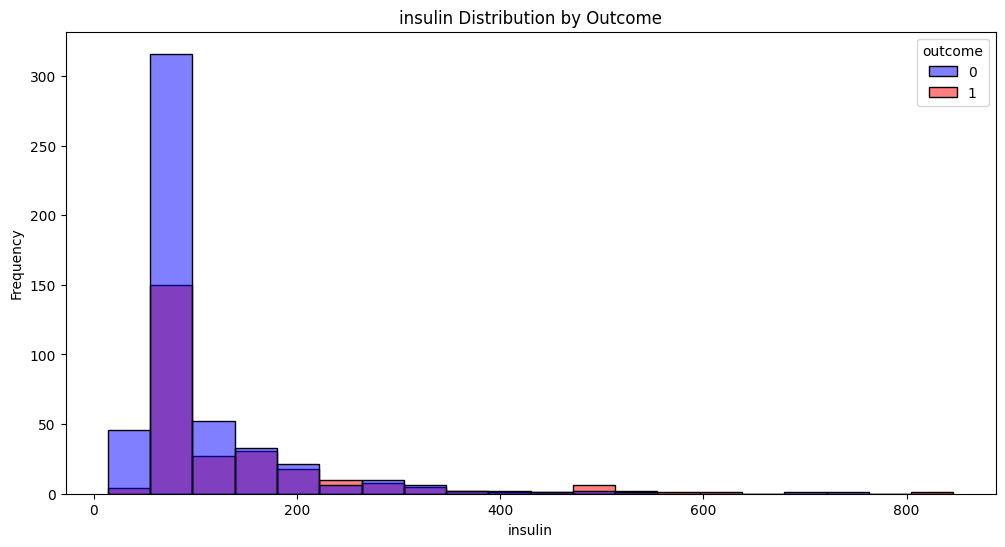

In [157]:
# Plot histogram of insulin
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for insulin with color coding for Outcome
sns.histplot(data=df, bins=20, x='insulin', hue='outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('insulin')
plt.ylabel('Frequency')
plt.title('insulin Distribution by Outcome')

# Display the plot
plt.show()

insulin is positively skewed/right-skewed meaning there are more people with a lower insulin levels than with higher insulin levels.Most people have insulin levels of below 200.

In [158]:
df. head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,50-59
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,30-39
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,30-39
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,20-29
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,30-39



###**bmi Column Analysis**

In [159]:
##performing descriptive analysis on bmi column
df['bmi'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: bmi, dtype: float64

The mean bmi is 31.992578, ranging from 0 to 67.1.t is not physiologically possible for someone to have a Body Mass Index (BMI) of 0 under normal circumstances. A BMI of 0 would imply that the individual has either no weight or no height, which is not feasible in a living human being.

In [160]:
#finding minimum bmi level that is not 0
df[df['bmi'] != 0]['bmi'].min()

18.2

In [161]:
#finding the diabetes outcome for the minimum and the maximum bmi values
print(df.loc[df['bmi'] == 18.2, 'outcome'].iloc[0])
print(df.loc[df['bmi'] == 67.1, 'outcome'].iloc[0])

0
1


BMI is a measure of body fat based on height and weight. Having a high Body Mass Index (BMI) is associated with an increased risk of developing type 2 diabetes. Having a low Body Mass Index (BMI) is generally not associated with an increased risk of type 2 diabetes. However, there are exceptions, and context matters. This is often seen in cases of lean individuals who have a condition called latent autoimmune diabetes in adults (LADA) or other forms of autoimmune diabetes.

In [162]:
#knowing the amount of bmi levels in the outliers region

# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

# Identify outliers
df[(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))].count().sum()

190

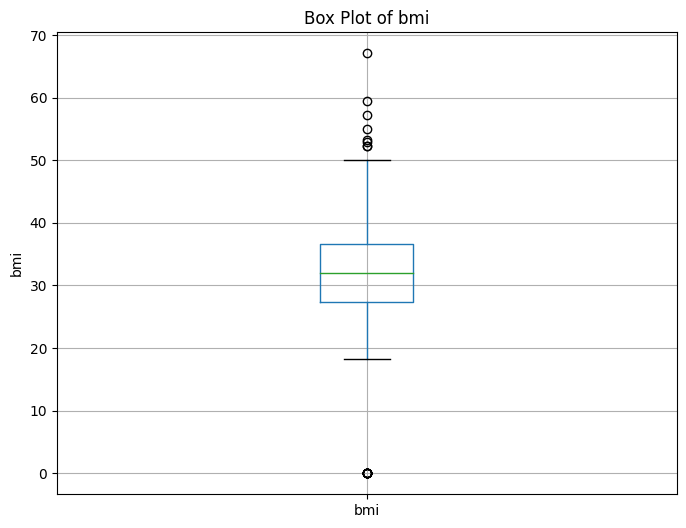

In [163]:
#showing the distribution of bmi using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='bmi')
plt.title('Box Plot of bmi')
plt.ylabel('bmi')
plt.show()

The box plot highlights outliers within the bmi column. Considering that a bmi reading of 0 is highly unlikely, rectifying these recordings with a bmi of 0 involves adjusting them to the mean value of the bmi column.

In [164]:
#dealing with outliers with a value of 0 in the bmi column by adjusting them to the mean.
# Calculate the mean of the 'bmi' column
mean_bmi= df['bmi'].mean()

# Replace 0 values with the mean of the column
df['bmi'] = df['bmi'].apply(lambda x: mean_bmi if x == 0 else x)

df['bmi'].describe()

count    768.000000
mean      32.450805
std        6.875374
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: bmi, dtype: float64

The new mean bmi level is 32.450805, with the minimum and maximum values being 18.2 and 67.1 respectively.

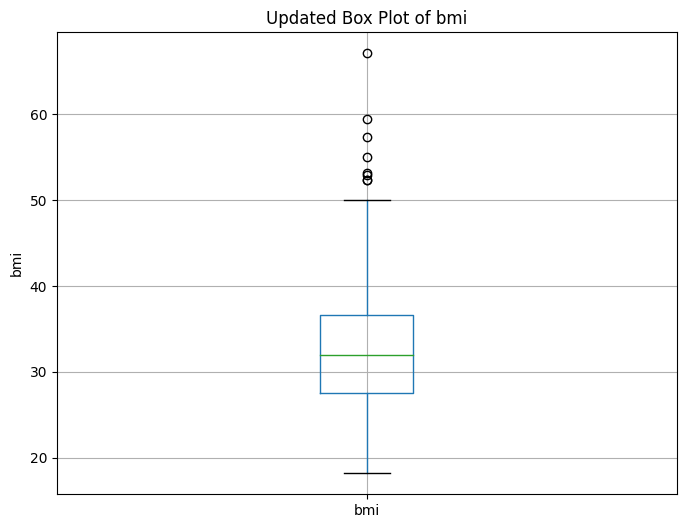

In [165]:
#upated box plot showing the distribution of bmi levels
plt.figure(figsize=(8, 6))
df.boxplot(column='bmi')
plt.title('Updated Box Plot of bmi')
plt.ylabel('bmi')
plt.show()

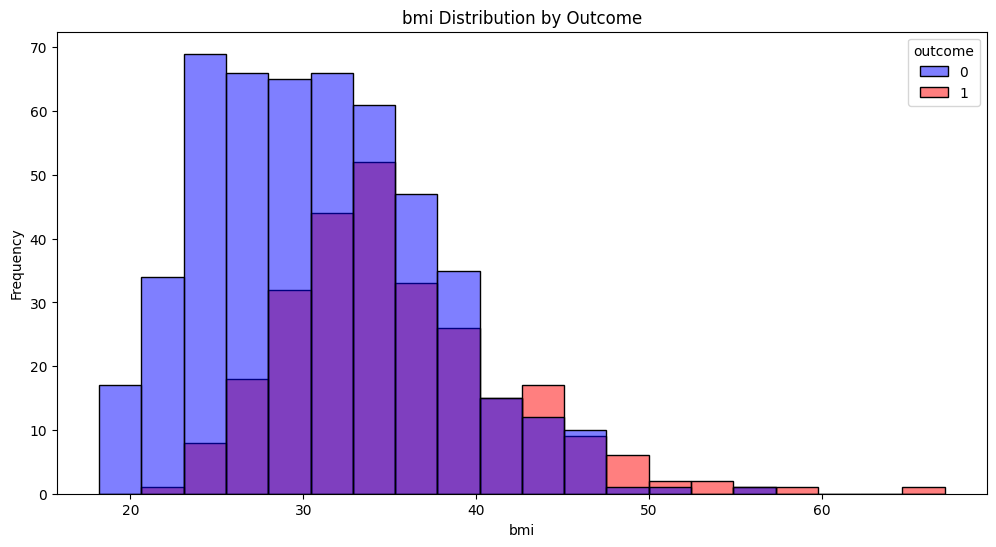

In [166]:
# Plot histogram of bmi
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for insulin with color coding for Outcome
sns.histplot(data=df, bins=20, x='bmi', hue='outcome', palette=['blue', 'red'], alpha=0.5)

# Add labels and title
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('bmi Distribution by Outcome')

# Display the plot
plt.show()

bmi is positively skewed/right-skewed meaning there are more people with a lower bmi than with a higher bmi.Most people have a bmi of below 40.

In [167]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,50-59
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,30-39
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,30-39
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,20-29
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,30-39


#**Research Specific Analysis**

Since our research question requires us to discover the factors that determine whether a patient has diabetes or not, we will make the 'Outcome' variable our main focus during this analysis.

#*Univariate Analysis*

In [168]:
# Getting summary statistics of numerical features
print(df.describe())

       pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              bmi  diabetespedigreefunction         age     outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  

We can plot a histogram to show the distribution of outcome within our dataset.

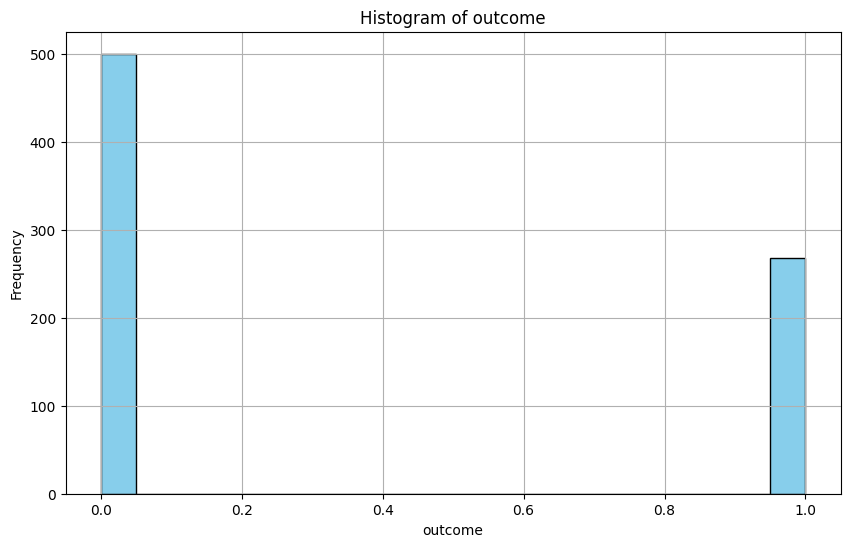

In [169]:
# Plot histogram of outcome
plt.figure(figsize=(10, 6))
plt.hist(df['outcome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of outcome')
plt.xlabel('outcome')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#*Multivariate Analysis*

In this section, we will conduct multivariate analysis to explore the relationship between the target variable, "outcome," and various features within the dataset, as well as examine correlations among independent variables. To visualize these correlations, we will utilize a heatmap to display the correlation matrix of the features, illustrating their relationships with each other and with the outcome variable.

A heatmap provides a clear representation of the strength and direction of correlations between pairs of variables through varying colors and shades. This visualization aids in identifying the most influential features for prediction while mitigating issues related to multicollinearity.

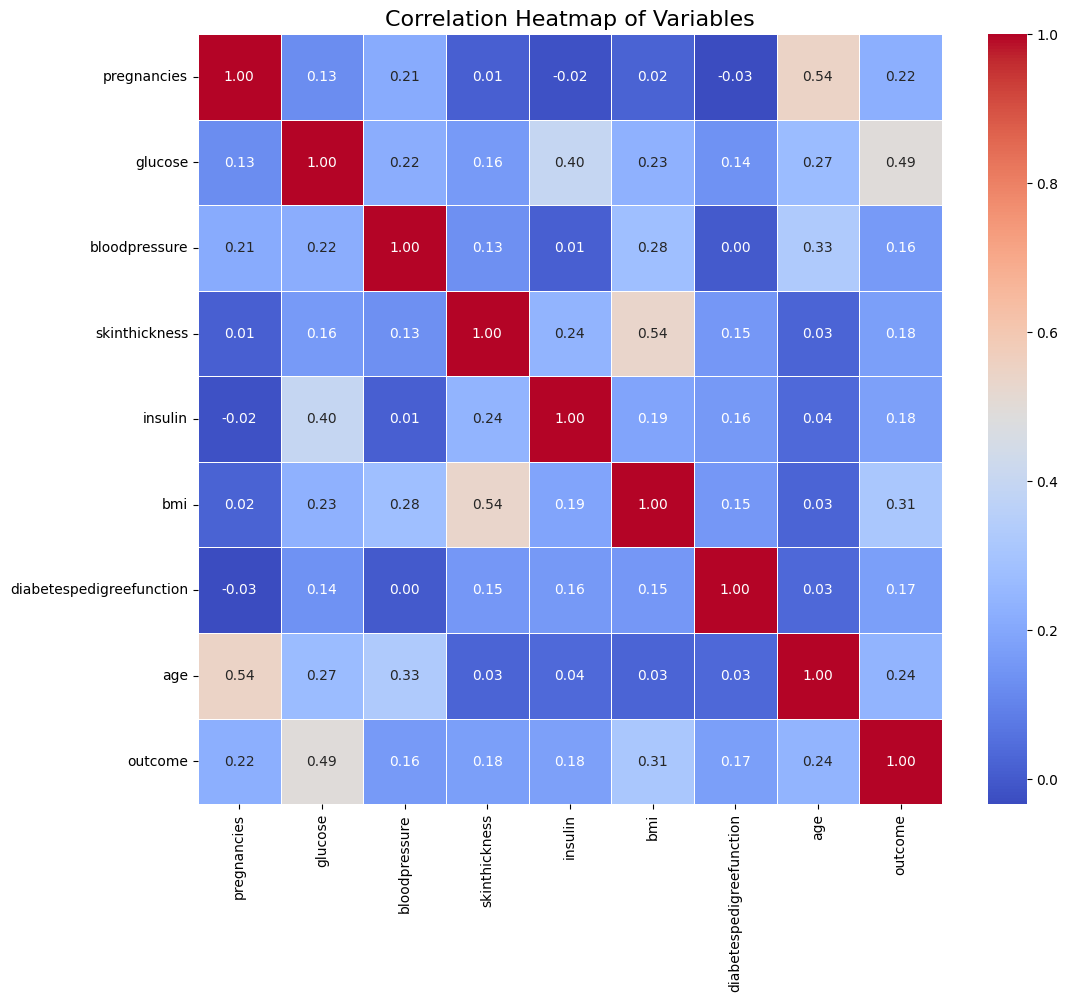

In [170]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Variables', fontsize=16)

# Show plot
plt.show()

There are several features that exhibit moderately strong correlations. The variable glucose demonstrates the highest correlations with the outcome at 49%.

In [171]:
#since the outcome is an object variable, either true/false (nominal variable) we convert it to a string instead of using the integers
df['outcome'] = df['outcome'].astype(str)

#Machine Learning with Scikit-Learn and TensorFlow

Define your x variables (independent variables) and y variables (dependent variable)

In [172]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,age_group
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,50-59
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,30-39
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,30-39
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,20-29
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,30-39


In [173]:
# Drop the 'outcome' and the 'age-group' columns from the DataFrame and define X (features)
X = df.drop(['outcome', 'age_group'], axis=1)

# Define y (target variable) as the 'outcome' column
y = df['outcome']

**First Step: Separate The Dataset into Train set and Test Set**

In [174]:
from sklearn.model_selection import train_test_split

# Assuming you have your dataset as X (features) and y (target variable)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing

In [175]:
#knowing the shape of each
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


We know that the x-axis has 10 column variables whereas the y-axis has one column variable (outcome)

In [176]:
#showing the features in X_train variable

X_train.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
60,2,84.0,69.105469,20.536458,79.799479,31.992578,0.304,21
618,9,112.0,82.000000,24.000000,79.799479,28.200000,1.282,50
346,1,139.0,46.000000,19.000000,83.000000,28.700000,0.654,22
294,0,161.0,50.000000,20.536458,79.799479,21.900000,0.254,65
231,6,134.0,80.000000,37.000000,370.000000,46.200000,0.238,46


##Feature Scaling

Feature scaling is crucial for standardizing the range of independent variables or features within a dataset. Two common methods are employed: min-max scaling, which confines values within the range of 0 to 1, and standardization, where values can extend beyond 1 and leverage the mean. Notably, standardization is less susceptible to the influence of outliers. Considering our analysis reveals a significant presence of outliers in the data, we opt for standardization as our preferred feature scaling method.

We will apply this on the X_variable features.

In [177]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
X_scaled = scaler.fit_transform(X)

# X_scaled now contains the standardized features

In [178]:
#preview X

print(X_scaled[:5])  # Display the first 5 rows of the array

[[ 0.63994726  0.86527574 -0.0210444   0.87205698 -0.41776815  0.16725546
   0.46849198  1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286  0.2486783  -0.41776815 -0.85153454
  -0.36506078 -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 -0.6306536  -0.41776815 -1.33182125
   0.60439732 -0.10558415]
 [-0.84488505 -1.07448042 -0.51658286 -0.37470037 -0.26510678 -0.6332224
  -0.92076261 -1.04154944]
 [-1.14185152  0.50362629 -2.66391618  0.87205698  0.5304233   1.54989902
   5.4849091  -0.0204964 ]]


#**Model Training**

In [179]:
#Import Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

1. Logistic Regression.

In [180]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LogisticRegression()

In [181]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [182]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [183]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.78
Confusion Matrix:
 [[84 15]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



2. K-Nearest Neighbors (KNN)

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have X_scaled and y from the previous steps
# X_scaled: Features (scaled)
# y: Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=5 (you can adjust the value of k as needed)
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.77
Confusion Matrix:
 [[79 20]
 [16 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



3. Decision Trees

In [185]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have X_scaled and y from the previous steps
# X_scaled: Features (scaled)
# y: Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Train the model on the training set
decision_tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.73
Confusion Matrix:
 [[72 27]
 [14 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78        99
           1       0.60      0.75      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.74       154



4. Using Random Forest

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have X_scaled and y from the previous steps
# X_scaled: Features (scaled)
# y: Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.77
Confusion Matrix:
 [[78 21]
 [15 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



5. Using Generalized Linear Model (GLM)

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have X_scaled and y from the previous steps
# X_scaled: Features (scaled)
# y: Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Train the model on the training set
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_regression.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.77
Confusion Matrix:
 [[83 16]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



6. Using Gradient Boosted Model (GBM)

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have X_scaled and y from the previous steps
# X_scaled: Features (scaled)
# y: Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier model
gbm_classifier = GradientBoostingClassifier()

# Train the model on the training set
gbm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gbm_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.76
Confusion Matrix:
 [[77 22]
 [15 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        99
           1       0.65      0.73      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.76      0.76       154



After evaluating various training algorithms, it becomes clear that Logistic Regression consistently delivers the most favorable outcomes. With an accuracy rate of 78%, it surpasses other methods in predictive performance. Notably, its precision for positive outcomes impressively reaches 71%, highlighting its capability to correctly identify relevant cases. Although its recall rate is slightly lower at 65%, prioritizing precision in the Precision/Recall Tradeoff proves advantageous due to the criticality of outcome sensitivity in this context.

##**ROC Curve**